# Intel Stock Price (INTC) Forecasting -- DNN Classification

In [ ]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data scaling
from sklearn.preprocessing import MinMaxScaler

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split

# Tensorflow sequential models
from tensorflow import keras
from keras import backend as clear
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

from keras.optimizers import SGD, Adam

# Functions for evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score
from imblearn.metrics import sensitivity_score, specificity_score
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
#load data(sometimes need to use "/")
#df = pd.read_csv('content/INTC.csv')
# Colab
INTCB = pd.read_csv('INTCB.csv')
INTCB

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000/1/3,1,1,0,0,0,0
1,2000/1/4,0,0,0,1,1,1
2,2000/1/5,0,0,0,0,0,1
3,2000/1/6,0,0,0,1,1,0
4,2000/1/7,1,1,1,1,1,1
...,...,...,...,...,...,...,...
5885,2023/5/24,0,0,0,0,0,1
5886,2023/5/25,0,1,1,1,1,0
5887,2023/5/26,1,1,1,1,1,0
5888,2023/5/30,0,1,1,1,1,1


In [ ]:
df2 = INTCB.copy()
df2['Date']=pd.to_datetime(df2['Date'], format='%Y-%m-%d')
df2

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,1,1,0,0,0,0
1,2000-01-04,0,0,0,1,1,1
2,2000-01-05,0,0,0,0,0,1
3,2000-01-06,0,0,0,1,1,0
4,2000-01-07,1,1,1,1,1,1
...,...,...,...,...,...,...,...
5885,2023-05-24,0,0,0,0,0,1
5886,2023-05-25,0,1,1,1,1,0
5887,2023-05-26,1,1,1,1,1,0
5888,2023-05-30,0,1,1,1,1,1


In [ ]:
new_df2=df2.iloc[:,[0,4]].copy()
new_df2

,Date,Close
0,2000-01-03,0
1,2000-01-04,1
2,2000-01-05,0
3,2000-01-06,1
4,2000-01-07,1
...,...,...
5885,2023-05-24,0
5886,2023-05-25,1
5887,2023-05-26,1
5888,2023-05-30,1


In [ ]:
# Create 3 lags
new_df2['Lag_1']=new_df2['Close'].shift(1).copy()
new_df2['Lag_2']=new_df2['Close'].shift(2).copy()
new_df2['Lag_3']=new_df2['Close'].shift(3).copy()
new_df2

,Date,Close,Lag_1,Lag_2,Lag_3
0,2000-01-03,0,NaN,NaN,NaN
1,2000-01-04,1,0.0,NaN,NaN
2,2000-01-05,0,1.0,0.0,NaN
3,2000-01-06,1,0.0,1.0,0.0
4,2000-01-07,1,1.0,0.0,1.0
...,...,...,...,...,...
5885,2023-05-24,0,0.0,0.0,1.0
5886,2023-05-25,1,0.0,0.0,0.0
5887,2023-05-26,1,1.0,0.0,0.0
5888,2023-05-30,1,1.0,1.0,0.0


In [ ]:
# Drop out missing values and rest index
clean_df2=new_df2.dropna(axis=0, how='any').copy()
clean_df2=clean_df2.reset_index(drop=True)
clean_df2
#clean_df2.to_csv('new_clean_df.csv')

,Date,Close,Lag_1,Lag_2,Lag_3
0,2000-01-06,1,0.0,1.0,0.0
1,2000-01-07,1,1.0,0.0,1.0
2,2000-01-10,1,1.0,1.0,0.0
3,2000-01-11,1,1.0,1.0,1.0
4,2000-01-12,0,1.0,1.0,1.0
...,...,...,...,...,...
5882,2023-05-24,0,0.0,0.0,1.0
5883,2023-05-25,1,0.0,0.0,0.0
5884,2023-05-26,1,1.0,0.0,0.0
5885,2023-05-30,1,1.0,1.0,0.0


In [ ]:
# Train data
Forecast_train_data2=clean_df2.iloc[0:4525,:].copy()
Forecast_train_data2

,Date,Close,Lag_1,Lag_2,Lag_3
0,2000-01-06,1,0.0,1.0,0.0
1,2000-01-07,1,1.0,0.0,1.0
2,2000-01-10,1,1.0,1.0,0.0
3,2000-01-11,1,1.0,1.0,1.0
4,2000-01-12,0,1.0,1.0,1.0
...,...,...,...,...,...
4520,2017-12-22,0,0.0,0.0,1.0
4521,2017-12-26,1,0.0,0.0,0.0
4522,2017-12-27,1,1.0,0.0,0.0
4523,2017-12-28,0,1.0,1.0,0.0


In [ ]:
# Test data
Forecast_test_data2=clean_df2.iloc[4525:4525+1362,:].copy()
Forecast_test_data2

,Date,Close,Lag_1,Lag_2,Lag_3
4525,2018-01-02,0,1.0,0.0,1.0
4526,2018-01-03,0,0.0,1.0,0.0
4527,2018-01-04,1,0.0,0.0,1.0
4528,2018-01-05,0,1.0,0.0,0.0
4529,2018-01-08,0,0.0,1.0,0.0
...,...,...,...,...,...
5882,2023-05-24,0,0.0,0.0,1.0
5883,2023-05-25,1,0.0,0.0,0.0
5884,2023-05-26,1,1.0,0.0,0.0
5885,2023-05-30,1,1.0,1.0,0.0


In [ ]:
# Rolling 1
Rol2_training_1=Forecast_train_data2.iloc[0:2260,:].copy()
Rol2_val_1=Forecast_train_data2.iloc[2260:2260+756,:].copy()

# Rolling 2
Rol2_training_2=Forecast_train_data2.iloc[749:3016,:].copy()
Rol2_val_2=Forecast_train_data2.iloc[3016:3016+754,:].copy()

# Rolling 3
Rol2_training_3=Forecast_train_data2.iloc[1504:3770,:].copy()
Rol2_val_3=Forecast_train_data2.iloc[3770:3770+775,:].copy()

In [ ]:
#set x (make prediction)
# Train
x_train2 = Rol2_training_1.drop(['Date','Close'],axis=1).copy()
#minimax scaling
MMscaler = MinMaxScaler(feature_range=(0, 1))
scalingT2 = MMscaler.fit_transform(x_train2)
scaled_x_train2 = pd.DataFrame(data=scalingT2)
scaled_x_train2.columns = ['Lag_1','Lag_2','Lag_3']

# Validation
x_val2 = Rol2_val_1.drop(['Date','Close'],axis=1).copy()
#minimax scaling
MMscaler = MinMaxScaler(feature_range=(0, 1))
scalingV2 = MMscaler.fit_transform(x_val2)
scaled_x_val2 = pd.DataFrame(data=scalingV2)
scaled_x_val2.columns = ['Lag_1','Lag_2','Lag_3']

#set y (want to predict)
y_train2 = Rol2_training_1['Close'].copy()
y_val2 = Rol2_val_1['Close'].copy()

In [ ]:
# Quick recap: Total of 12 features in the data set
scaled_x_train2.head()

,Lag_1,Lag_2,Lag_3
0,0.0,1.0,0.0
1,1.0,0.0,1.0
2,1.0,1.0,0.0
3,1.0,1.0,1.0
4,1.0,1.0,1.0


In [ ]:
# Tips: Using shape to call the amount of features in the data set
input_features2=scaled_x_train2.shape[1]
print('Amount of features:',input_features2)

Amount of features: 3


In [ ]:
# Create the model (Three Hidden)
clear.clear_session()
model=Sequential()

# Input layer
model.add(Dense(units=100, input_dim=3))

# Hidden layer
model.add(Dense(units=100, activation='tanh')) # 120, 100
model.add(Dropout(0.5))

model.add(Dense(units=70, activation='tanh')) # 80, 70
model.add(Dropout(0.5))

model.add(Dense(units=50, activation='tanh')) # 50
model.add(Dropout(0.5))


# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the defined Net
#opt = SGD(learning_rate=0.05,momentum=0.5)
opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2 = 0.999, epsilon = 1e-8)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# Finally check the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               400       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 70)                7070      
                                                                 
 dropout_1 (Dropout)         (None, 70)                0         
                                                                 
 dense_3 (Dense)             (None, 50)                3550      
                                                                 
 dropout_2 (Dropout)         (None, 50)                0

In [ ]:
# Create the model (Six Hidden)
clear.clear_session()
model6=Sequential()

# Input layer
model6.add(Dense(units=100, input_dim=3))

# Hidden layer
model6.add(Dense(units=100, activation='tanh')) # 120, 100
model6.add(Dropout(0.5))

model6.add(Dense(units=100, activation='tanh')) # 120, 100
model6.add(Dropout(0.5))

model6.add(Dense(units=70, activation='tanh')) # 80, 70
model6.add(Dropout(0.5))

model6.add(Dense(units=70, activation='tanh')) # 80, 70
model6.add(Dropout(0.5))

model6.add(Dense(units=50, activation='tanh')) # 50
model6.add(Dropout(0.5))

model6.add(Dense(units=50, activation='tanh')) # 50
model6.add(Dropout(0.5))


# Output layer
model6.add(Dense(units=1, activation='sigmoid'))

# Compile the defined Net
#opt = SGD(learning_rate=0.05,momentum=0.5)
opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2 = 0.999, epsilon = 1e-8)
model6.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# Finally check the model
model6.summary()

In [ ]:
# Important
x_training,x_validation,y_training,y_validation=train_test_split(x_train2,y_train2,test_size=0.2,random_state=42)


In [ ]:
# Store in the history for more useful information
history=model.fit(x_training, y_training, epochs=300, batch_size=128,verbose=1,validation_data=(x_validation, y_validation))


Epoch 1/300
15/15 [==============================] - 0s 6ms/step - loss: 0.7455 - accuracy: 0.4917 - val_loss: 0.7039 - val_accuracy: 0.4779
Epoch 2/300
15/15 [==============================] - 0s 2ms/step - loss: 0.7177 - accuracy: 0.5177 - val_loss: 0.6939 - val_accuracy: 0.5044
Epoch 3/300
15/15 [==============================] - 0s 2ms/step - loss: 0.7251 - accuracy: 0.4845 - val_loss: 0.6913 - val_accuracy: 0.5553
Epoch 4/300
15/15 [==============================] - 0s 2ms/step - loss: 0.7138 - accuracy: 0.4934 - val_loss: 0.6967 - val_accuracy: 0.4779
Epoch 5/300
15/15 [==============================] - 0s 2ms/step - loss: 0.7030 - accuracy: 0.5194 - val_loss: 0.6963 - val_accuracy: 0.4580
Epoch 6/300
15/15 [==============================] - 0s 2ms/step - loss: 0.7084 - accuracy: 0.4928 - val_loss: 0.6942 - val_accuracy: 0.4801
Epoch 7/300
15/15 [==============================] - 0s 2ms/step - loss: 0.7099 - accuracy: 0.5017 - val_loss: 0.6958 - val_accuracy: 0.4801
Epoch 8/300
1

In [ ]:
# Check the dictionary keys
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

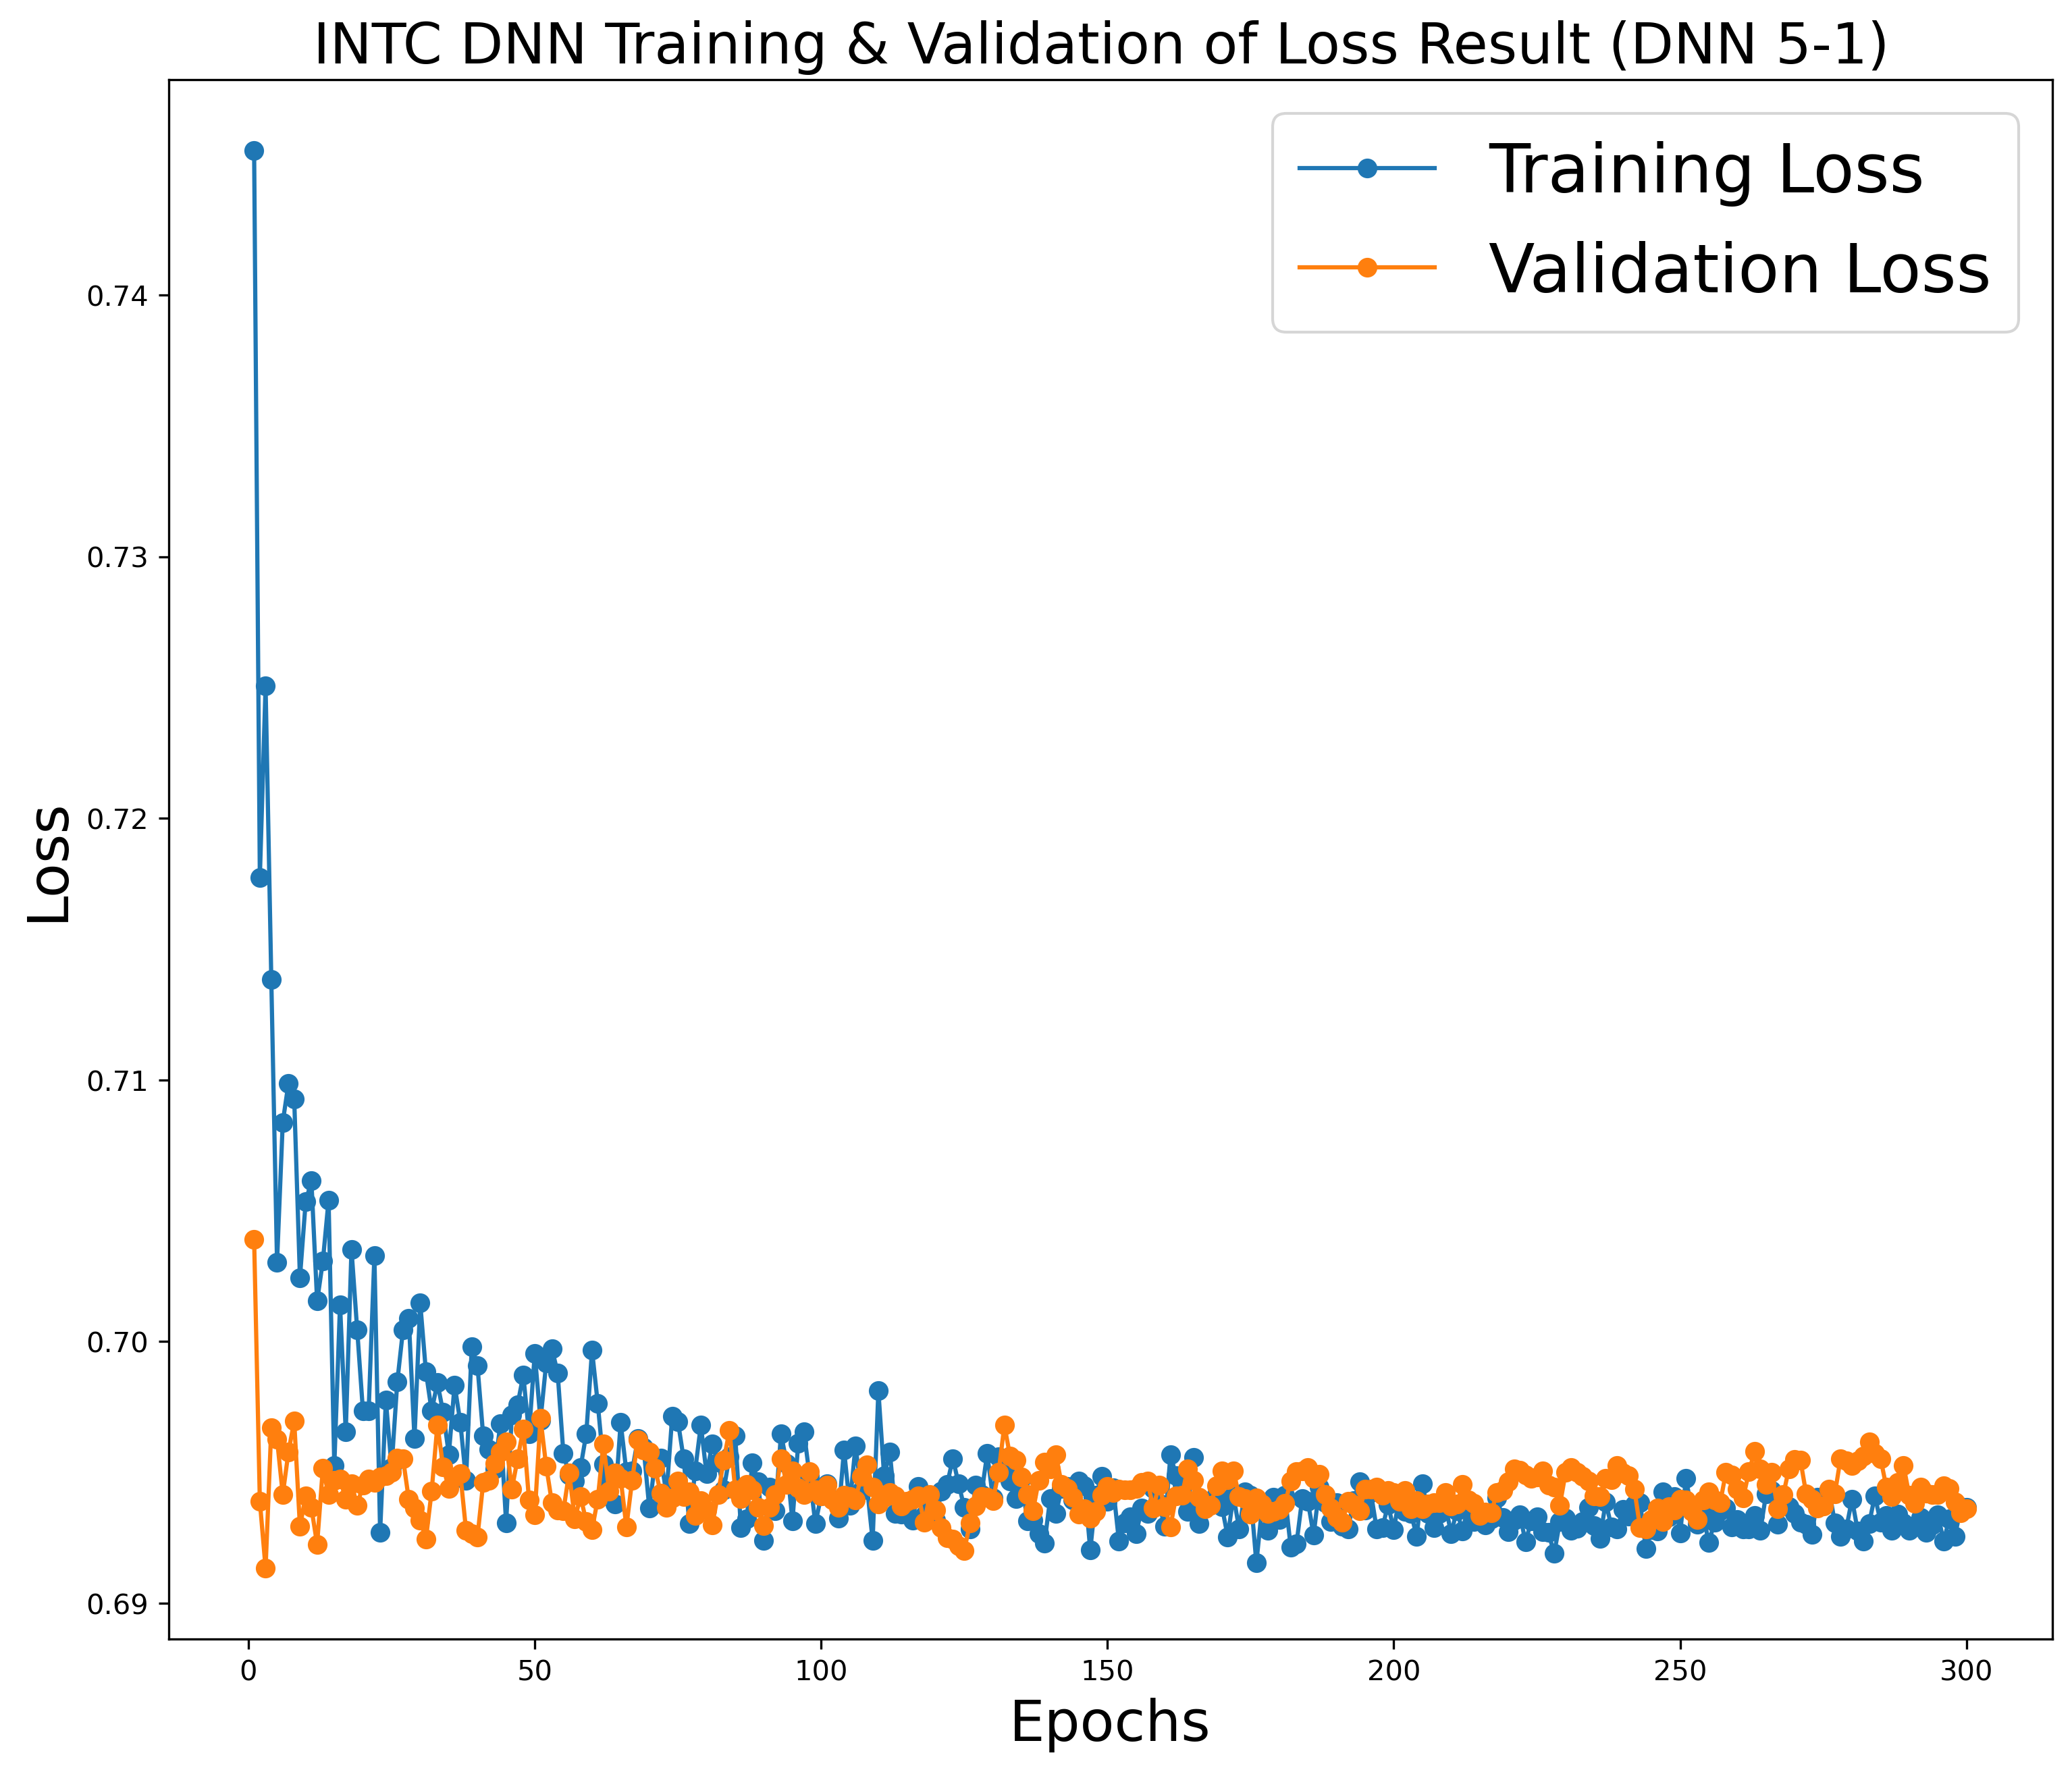

In [ ]:
# Plot the history of training and validation

training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss',fontsize=20)
plt.title('INTC DNN Training & Validation of Loss Result (DNN 5-1) ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='o',label='Training Loss')
plt.plot(epochs, val_loss_values,marker='o',label='Validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

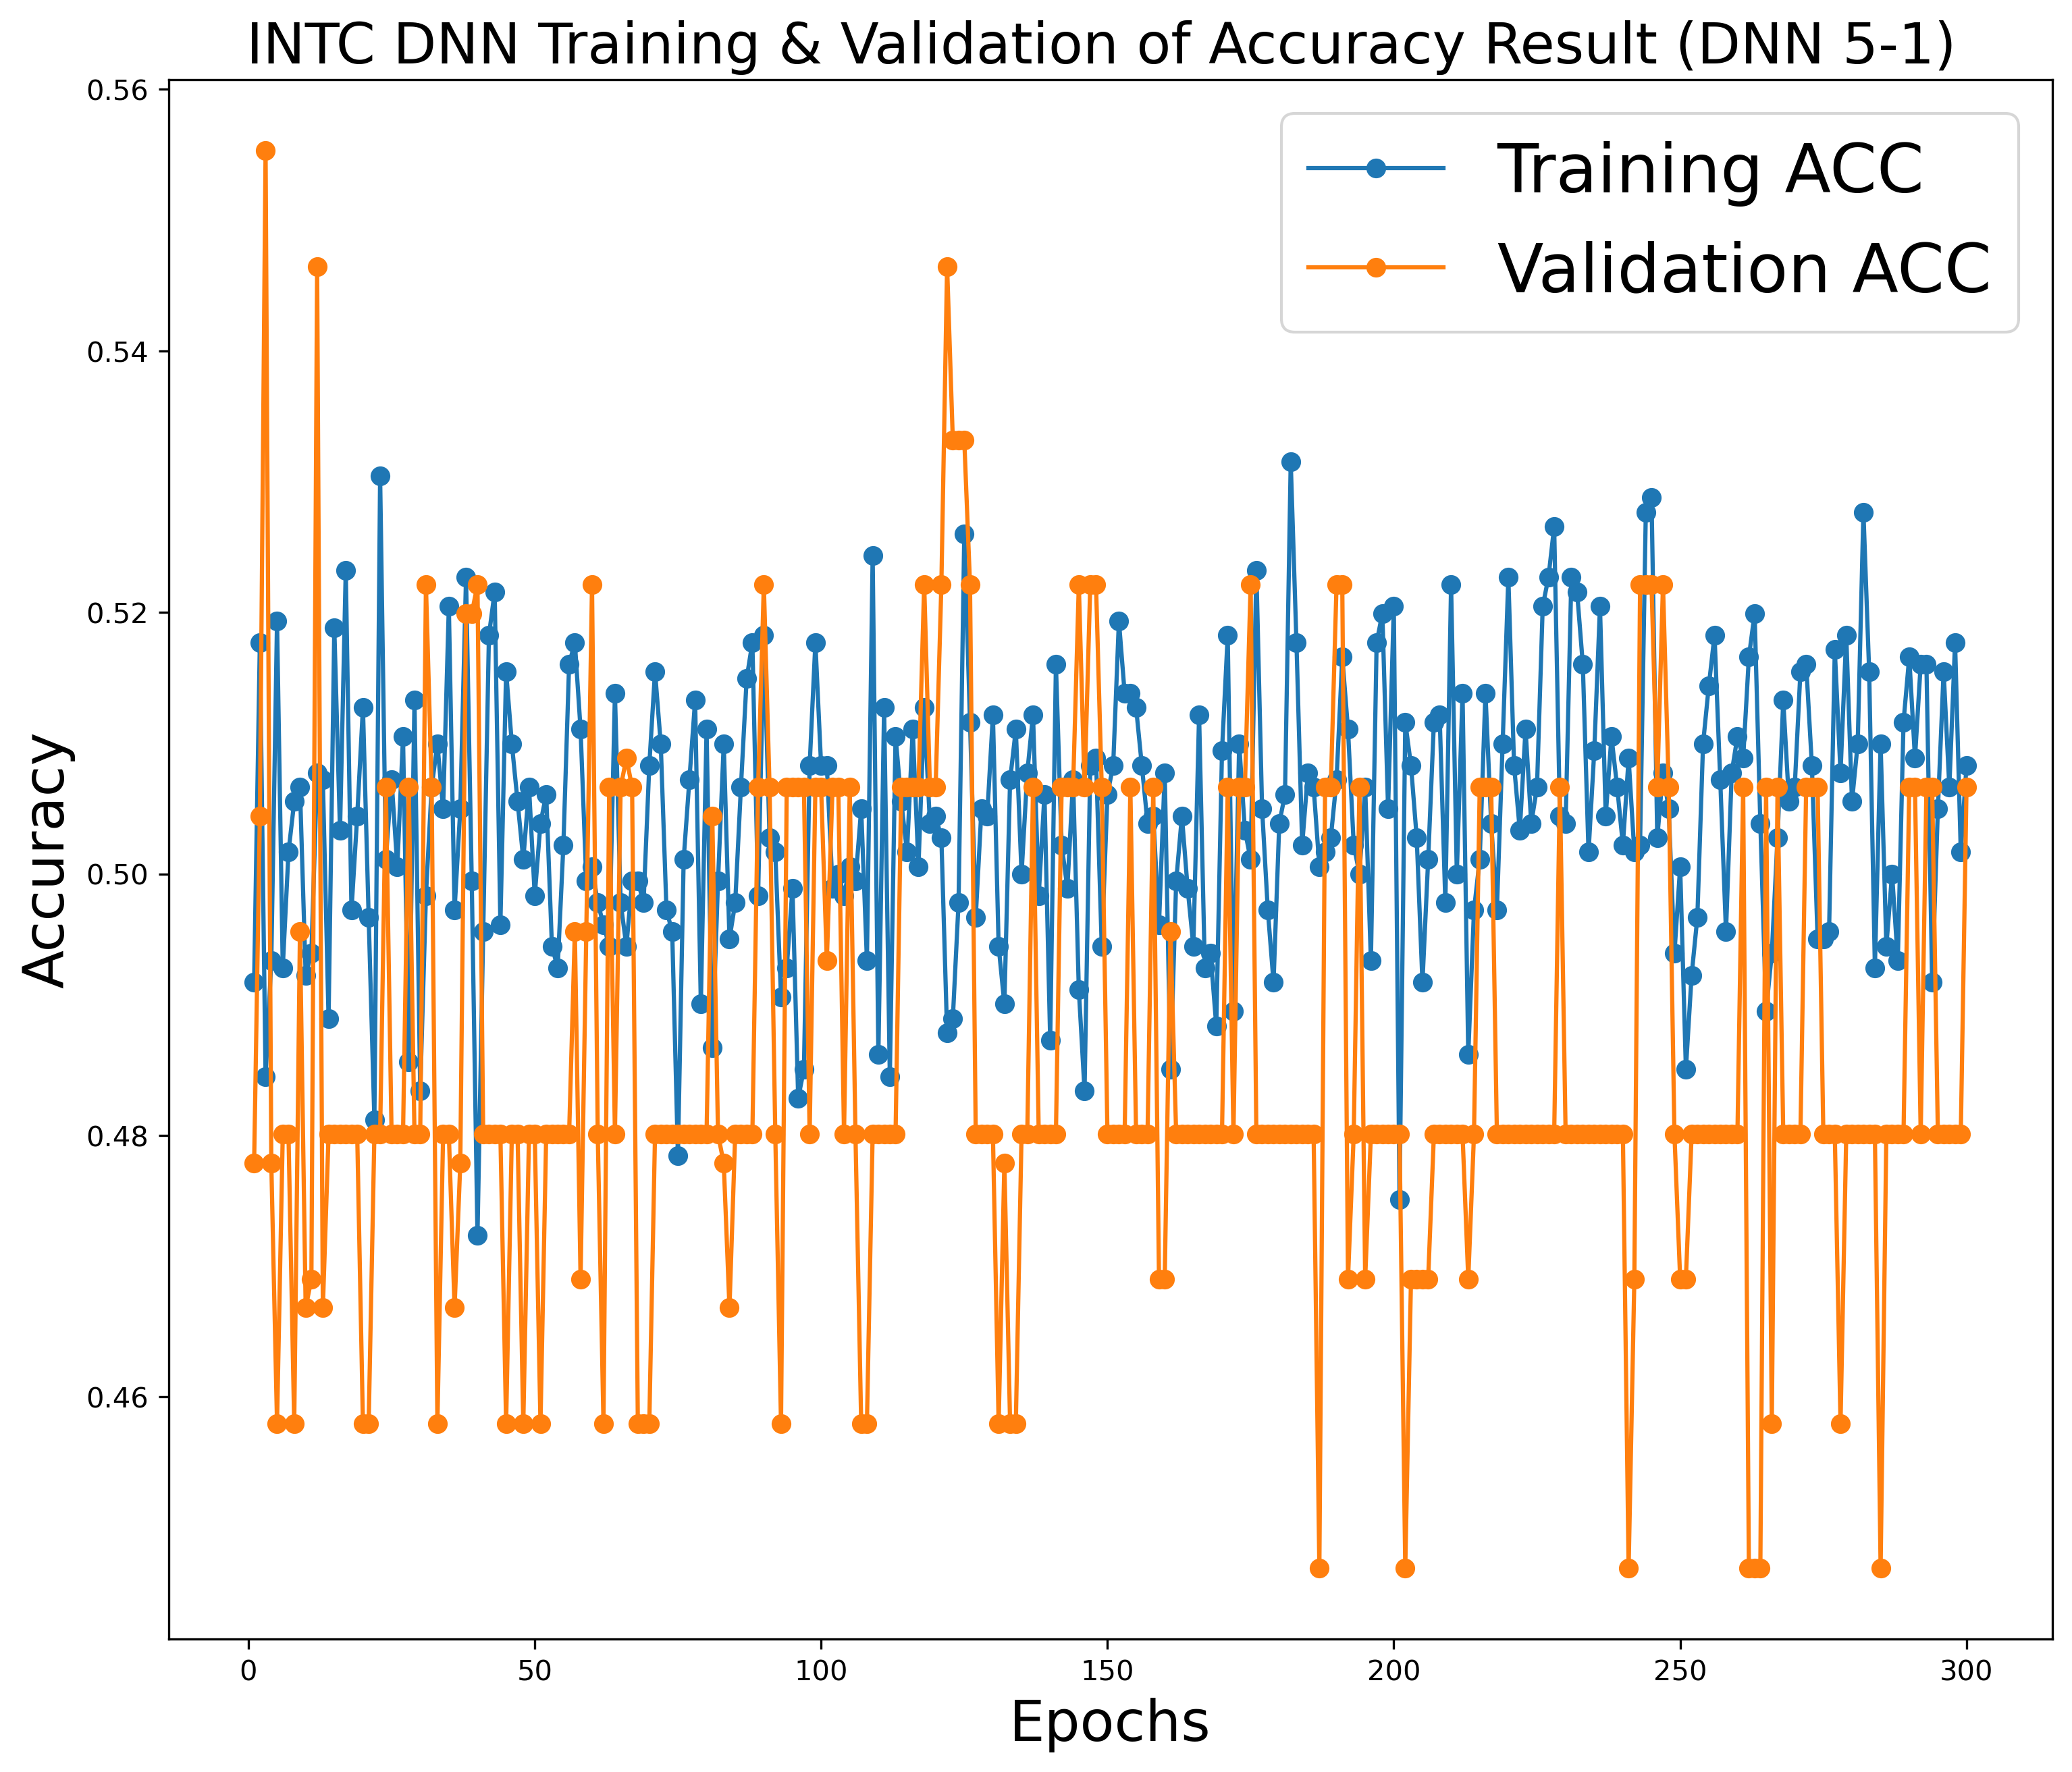

In [ ]:
# Plot the history of training and validation

training_acc_values=modeling_result['accuracy']
val_acc_values=modeling_result['val_accuracy']
epochs=range(1,len(training_acc_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.title('INTC DNN Training & Validation of Accuracy Result (DNN 5-1) ',fontsize=20)

plt.plot(epochs, training_acc_values,marker='o',label='Training ACC')
plt.plot(epochs, val_acc_values,marker='o',label='Validation ACC')
plt.legend(loc=1,fontsize=24)
plt.show()

In [ ]:
# 7.3 Save the trained model
#Fmodel.save('D:/data_analysis/PyExport/Rainfall_forecast_ANN_trained_model.h5')
# Colab
model.save('INTC STOCK DNN_trained_model_C.h5')
print('Model has been saved...')

Model has been saved...


In [ ]:
# 7.4 Restore the saved model for testing
#ANN_model=keras.models.load_model('D:/data_analysis/PyExport/Rainfall_forecast_ANN_trained_model.h5')
# Colab
DNN_model_C = keras.models.load_model('INTC STOCK DNN_trained_model_C.h5')
print('Model successfully loaded...')

Model successfully loaded...


In [ ]:
# 8.1 Make prediction
# X test
x_test2 = Forecast_test_data2.drop(['Date','Close'],axis=1).copy()
# Y test
y_test2 = Forecast_test_data2['Close'].copy()

prediction = DNN_model_C.predict_on_batch(x_test2)
prediction

array([[0.4855589 ],
       [0.49657375],
       [0.5137435 ],
       ...,
       [0.48217085],
       [0.46847916],
       [0.47244895]], dtype=float32)

In [ ]:
# 8.2 Transform the predictions to 0 and 1
testing_prediction=(DNN_model_C.predict_on_batch(x_test2) >= 0.5).astype('int')
testing_prediction

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
# 8.3 Calculating the mertics
testing_acc=accuracy_score(y_test2,testing_prediction)
testing_f1s=f1_score(y_test2,testing_prediction,pos_label=1)
testing_pre=precision_score(y_test2,testing_prediction,pos_label=1)
testing_sen=sensitivity_score(y_test2,testing_prediction,pos_label=1)
testing_spe=specificity_score(y_test2,testing_prediction,pos_label=1)
testing_cm=confusion_matrix(y_test2,testing_prediction)
print('Testing Result:')
print('Testing Accuracy Score:',round(testing_acc*100,2))
print('Testing f1 Score:',round(testing_f1s*100,2))
print('Testing Precision Score:',round(testing_pre*100,2))
print('Testing Sensitivity Score:',round(testing_sen*100,2))
print('Testing Specificity Score:',round(testing_spe*100,2))
print('')
print('Testing Confusion Matrix:')
print(testing_cm)

Testing Result:
Testing Accuracy Score: 50.51
Testing f1 Score: 43.07
Testing Precision Score: 49.61
Testing Sensitivity Score: 38.06
Testing Specificity Score: 62.57

Testing Confusion Matrix:
[[433 259]
 [415 255]]


<Figure size 1500x1500 with 0 Axes>

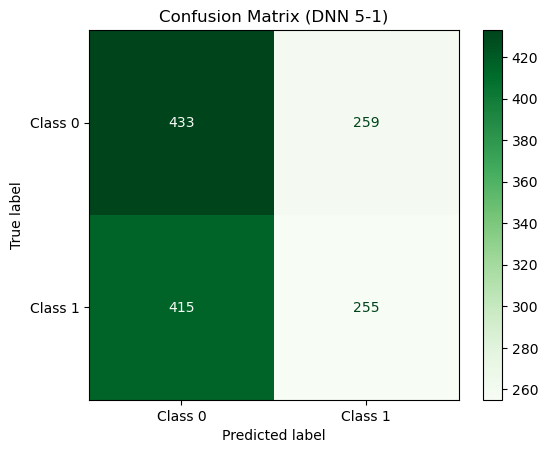

In [ ]:
display = ConfusionMatrixDisplay(confusion_matrix = testing_cm, display_labels = ["Class 0", "Class 1"])
plt.figure(figsize=(10, 10), dpi=150)
display.plot(cmap='Greens')
plt.title("Confusion Matrix (DNN 5-1)")
plt.show()

In [ ]:
# Tip: Quick testing with the metrics set for the model by using evaluate function
DNN_model_C.evaluate(x_test2,y_test2,batch_size=64,verbose=1)

22/22 [==============================] - 0s 438us/step - loss: 0.6933 - accuracy: 0.5051


[0.6933190226554871, 0.5051395297050476]